In [1]:
#load library
from scipy.ndimage import shift
import matplotlib.pyplot as plt
from scipy import datasets
from openpiv.tools import imread
from pylab import *
import cv2

In [2]:
#LOAD IMAGE AND SHIFT
# Load the image with four channels
#impo_im 
impo_im= cv2.imread('pattern1.5M0.05 (2).png', cv2.IMREAD_UNCHANGED)
image_mean=impo_im-mean(impo_im, axis=(0,1)) #equation 2
image=image_mean[:, :, 0]
#shift image vertically
image_shifted_vertically = shift(image,shift= (0, 1),mode='reflect')

image_shifted_both_directions = shift(image, (100, 4))#,mode='reflect')


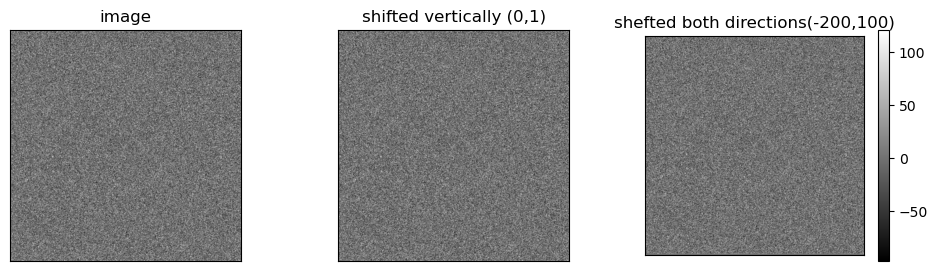

In [44]:
#plot images
# Set a larger figure size
figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('image'), plt.xticks([]), plt.yticks([])
#colorbar()

# Plotting phase spectrum
plt.subplot(1, 3, 2)
plt.imshow(image_shifted_vertically, cmap='gray')  # 'hsv' colormap for phase
plt.title('shifted vertically (0,1)'), plt.xticks([]), plt.yticks([])
#colorbar()

# Plotting phase spectrum
plt.subplot(1, 3, 3)
plt.imshow(image_shifted_both_directions, cmap='gray')  # 'hsv' colormap for phase
plt.title('shefted both directions(-200,100)'), plt.xticks([]), plt.yticks([])
colorbar()

plt.show()

In [4]:
#correlate2d

def correlate2d(image1, image2):

    #Fourier 
    I_1 = np.fft.rfft2(image1)  #equation 3
    I_2 = np.fft.rfft2(image2)  #equation 3

    #cross power spectrum 
    CPS= I_1*I_2.conjugate() #equation 6
    NCPS= CPS/ np.abs(CPS)

    #cross-correlation
    R_1= fftshift(np.fft.irfft2(NCPS)) #equation 10 #real(R_1)

    return R_1


0 1


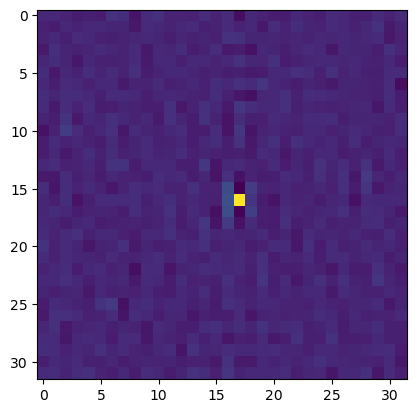

In [49]:
ia = image[:32,:32]
plt.imshow(ia)
ib =image_shifted_vertically[:32, :32]#shift(ia,shift= (-3, 4),mode='reflect') #(shift in x, shift in y)

R = correlate2d(ib,ia)
plt.imshow(real(R))
i,j = unravel_index(R.argmax(),R.shape)
print(i-16,j-16) #relative to the center of the image

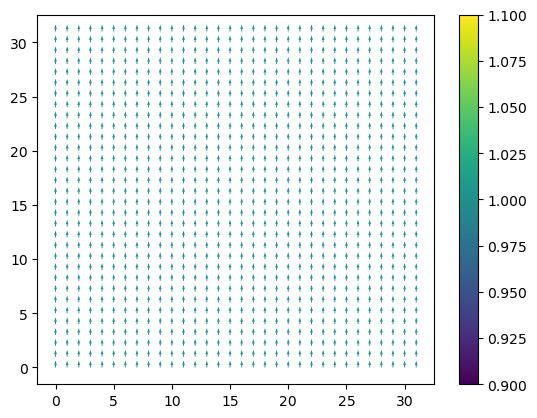

In [50]:
# Get the shape of the image array
rows, cols = ia.shape

# Create x and y coordinates using meshgrid
x, y = np.meshgrid(np.arange(cols), np.arange(rows))
u=i-16
v=j-16
M = sqrt(pow(array(u), 2) + pow(array(v), 2))

quiver(x,y,u,v,M)
colorbar()

In [51]:
#ia.shape
M 

1.0

In [20]:
#referance image
a_ip= cv2.imread('EXP01TRY000001.T000.D000.P000.H000.LB.TIF', cv2.IMREAD_UNCHANGED)
a_mean=a_ip-mean(a_ip, axis=(0,1)) #equation 2
a=a_mean[:, :]

#shefted image
b_ip =cv2.imread('EXP01TRY000029.T000.D000.P000.H000.LB.TIF', cv2.IMREAD_UNCHANGED)
b_mean=b_ip-mean(b_ip, axis=(0,1)) #equation 2
b=b_mean[:, :]
b.shape 

(2712, 3376)

C:\Users\PIV\AppData\Local\Temp\ipykernel_22448\166215056.py:11: RuntimeWarning: invalid value encountered in divide
  NCPS= CPS/ np.abs(CPS)


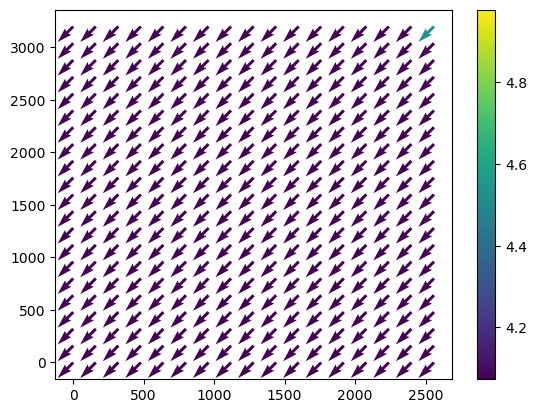

In [21]:

iw = (32, 32)
#a=image[:, :]
#b=image_shifted_vertically[:, :]

# Initialize lists for storing results
x, y, u, v = [], [], [], []

for k in range(0, a.shape[0],160):
    for m in range(0, a.shape[1],160):
        # Check if the current block is within the image boundaries
        if k + iw[0] <= a.shape[0] and m + iw[1] <= a.shape[1]:

          ia = a[k:k+iw[0], m:m+iw[1]]
          ib = b[k:k+iw[0], m:m+iw[1]]
        
         # Cross-correlation
          c = correlate2d(ib, ia)
          i, j = (unravel_index(c.argmax(), c.shape))
        
          # Append values to respective lists
          rows, cols=ia.shape
          x.append(np.meshgrid(np.arange(cols)))
          y.append(np.meshgrid(np.arange(rows)))
          u.append((i - 16)*0.2)
          v.append((j - 16)*0.2)

          # Calculate magnitude for this particular patch
          M = sqrt(((i - 16)*0.2)**2 + ((j - 16)*0.2)**2) # 0.2 is for scalling 
          

            # Plotting vectors for this patch
          plt.quiver(k , m , (i - 16)*0.2, (j - 16)*0.2, M) # 0.2 is for scalling 

# Display colorbar
plt.colorbar()

plt.show()


0 -13


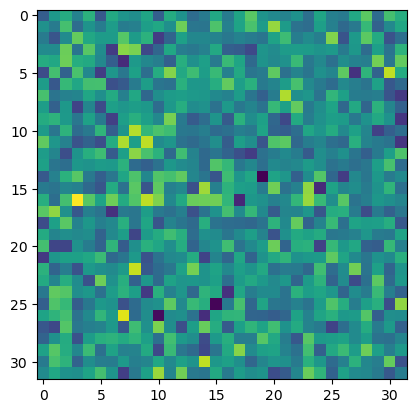

In [27]:
ia = a[500:532,500:532]
plt.imshow(ia)
ib = b[500:532,3000:3032]#image_shifted_vertically[:32, :32]#shift(ia,shift= (-3, 4),mode='reflect') #(shift in x, shift in y)

R = correlate2d(ib,ia)
plt.imshow(real(R))
i,j = unravel_index(R.argmax(),R.shape)
print(i-16,j-16) #relative to the center of the image